C:\Users\daseb\AppData\Local\Temp\ipykernel_21420\798959041.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 1])


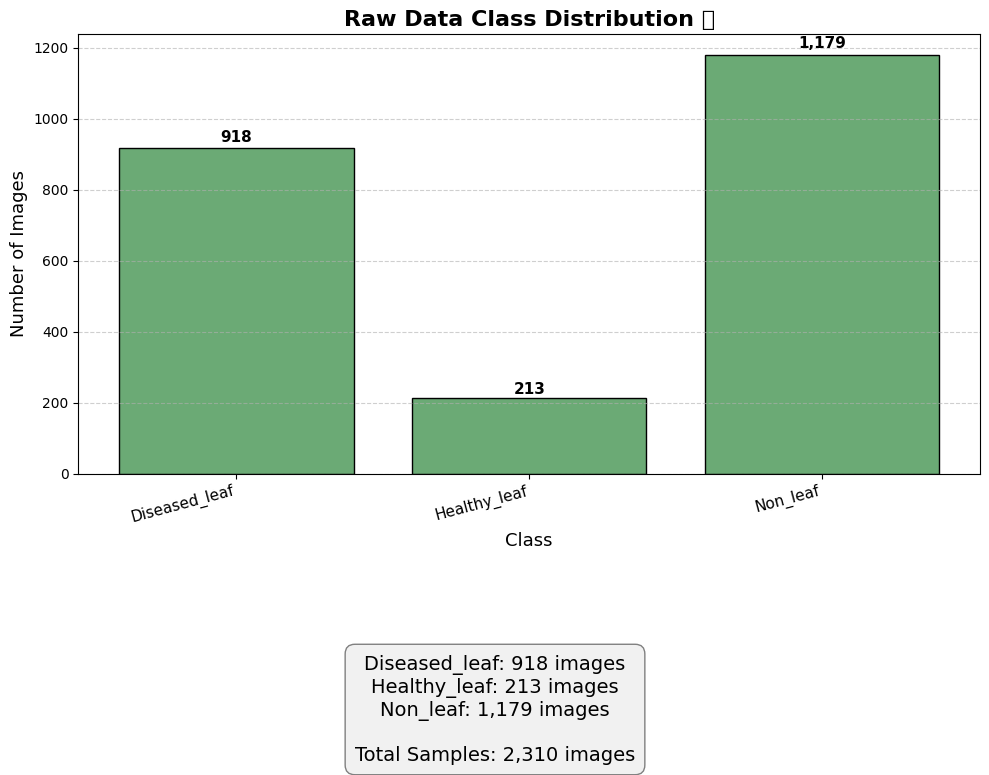

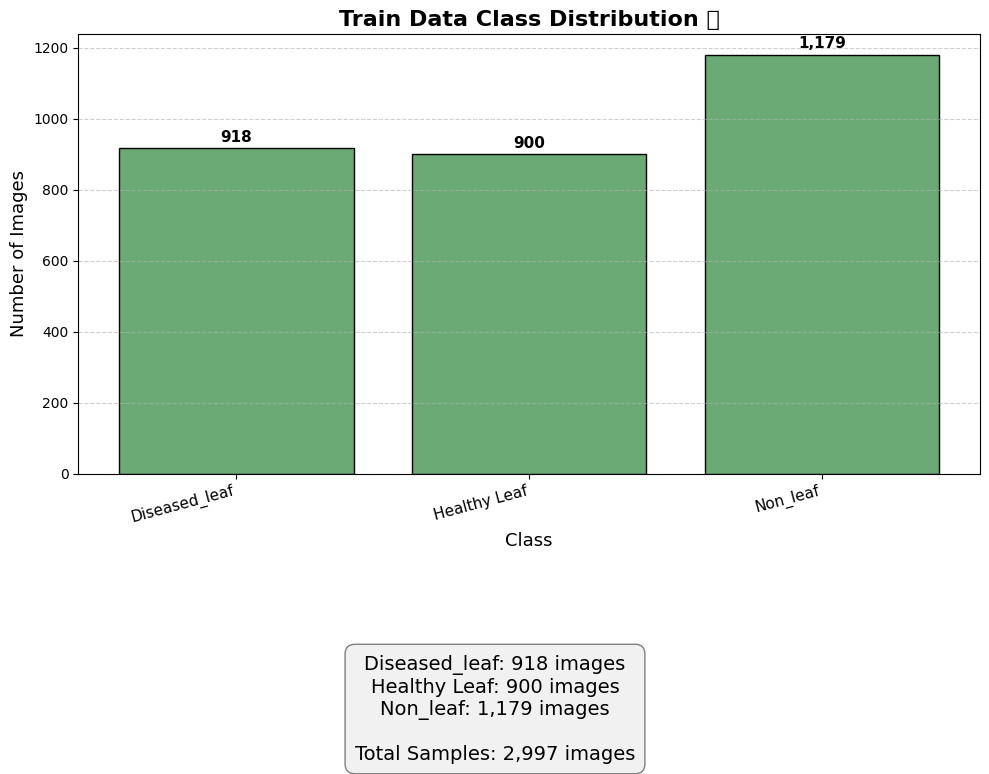

In [6]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(dataset_path, title):
    # Count images per class
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[class_name] = count

    class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))
    total_samples = sum(class_counts.values())

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(class_counts.keys(), class_counts.values(), color="#6BAA75", edgecolor="black")

    # Add count labels above bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + height * 0.01,
            f"{int(height):,}",
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )

    summary_lines = [f"{cls}: {count:,} images" for cls, count in class_counts.items()]
    summary_text = "\n".join(summary_lines) + f"\n\nTotal Samples: {total_samples:,} images"

    # Display text box below the plot
    plt.gcf().text(
        0.5, -0.1,
        summary_text,
        ha='center',
        va='top',
        fontsize=14,
        bbox=dict(facecolor='#f1f1f1', edgecolor='gray', boxstyle='round,pad=0.5')
    )

    # Titles and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Class", fontsize=13)
    plt.ylabel("Number of Images", fontsize=13)

    # Style
    plt.xticks(rotation=15, ha='right', fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# Plot for both datasets
plot_class_distribution("dataset/raw_data", "Raw Data Class Distribution 📊")
plot_class_distribution("dataset/train_data", "Train Data Class Distribution 📊")
